In [1]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist

X, Y, test_x, test_y = mnist.load_data(one_hot=True)

X = X.reshape([-1, 28, 28, 1])
test_x = test_x.reshape([-1, 28, 28, 1])

# Building convolutional convnet
convnet = input_data(shape=[None, 28, 28, 1], name='input1')
# http://tflearn.org/layers/conv/
# http://tflearn.org/activations/
convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 10, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=0.01, loss='categorical_crossentropy', name='targets1')

model = tflearn.DNN(convnet)
model.fit({'input1': X}, {'targets1': Y}, n_epoch=5, validation_set=({'input1': test_x}, {'targets1': test_y}), 
    snapshot_step=500, show_metric=True, run_id='mnist')

model.save('quicktest.model')

Training Step: 4299  | total loss: 0.16802 | time: 13.456s
| Adam | epoch: 005 | loss: 0.16802 - acc: 0.9754 -- iter: 54976/55000
Training Step: 4300  | total loss: 0.15169 | time: 14.790s
| Adam | epoch: 005 | loss: 0.15169 - acc: 0.9778 | val_loss: 0.09859 - val_acc: 0.9796 -- iter: 55000/55000
--
INFO:tensorflow:/content/quicktest.model is not in all_model_checkpoint_paths. Manually adding it.


In [2]:
model.load('quicktest.model')

INFO:tensorflow:Restoring parameters from /content/quicktest.model


In [20]:
test_x[1].shape

(28, 28, 1)

Text(0.5, 1.0, '6')
Text(0.5, 0, '6')


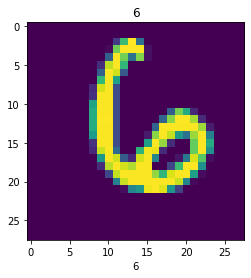

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
print(plt.title(str(np.argmax(np.round(model.predict([test_x[88]])[0])))))
plt.imshow(test_x[88].reshape(28,28))

print(plt.xlabel(str(np.argmax(test_y[88]))))